Chuẩn bị dữ liệu

In [1]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

Khám phá dữ liệu

In [2]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

Kiểm tra tính đúng đắn của dữ liệu

In [3]:
# First rows of `red` 
red.head()

# Last rows of `white`
white.tail()

# Take a sample of 5 rows of `red`
red.sample(5)

# Describe `white`
white.describe()

# Double check for null values in `red`
pd.isnull(red)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
5             False             False        False           False      False   
6             False             False        False           False      False   
7             False             False        False           False      False   
8             False             False        False           False      False   
9             False             False        False           False      False   
10            False             False        False           False      False   
11            False             False        False           False      False   
12            False             False        False           False      False   
13            False             False        False           False      False   
14            False             False        False           False      False   
15            False             False        False           False      False   
16            False             False        False           False      False   
17            False             False        False           False      False   
18            False             False        False           False      False   
19            False             False        False           False      False   
20            False             False        False           False      False   
21            False             False        False           False      False   
22            False             False        False           False      False   
23            False             False        False           False      False   
24            False             False        False           False      False   
25            False             False        False           False      False   
26            False             False        False           False      False   
27            False             False        False           False      False   
28            False             False        False           False      False   
29            False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1569          False             False        False           False      False   
1570          False             False        False           False      False   
1571          False             False        False           False      False   
1572          False             False        False           False      False   
1573          False             False        False           False      False   
1574          False             False        False           False      False   
1575          False             False        False           False      False   
1576          False             False        False           False      False   
1577          False             False        False           False      False   
1578          False             False        False           False      False   
1579          False             False        False           False      False   
1580          False             False        False           False      False   
1581          False             False        False           False      False   
1582          False             False        False           False      False   
1583          False             False        False           False      False   
1584          False             False        False           False      False   
1585          False             False        False           False      False   
1586          False             False

Trực quan hoá dữ liệu

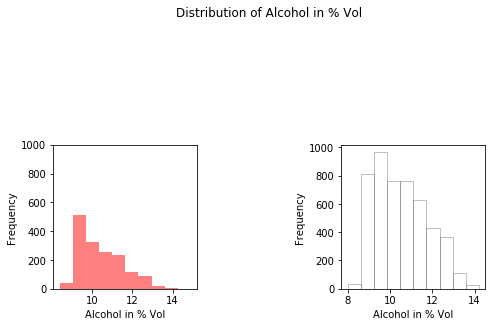

In [4]:
import matplotlib.pyplot as plt
#Hiển thị plot trực tiếp trên jupyter
%matplotlib inline

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

Tính toán phân bố dữ liệu dựa trên historgram

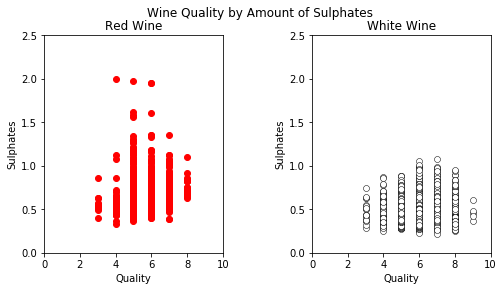

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Tương quan phân bố giữa các đặc trưng của dữ liệu

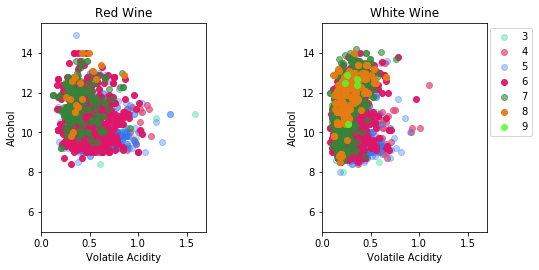

In [6]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Tích hợp dữ liệu

In [7]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

Tương quan giữa các lớp

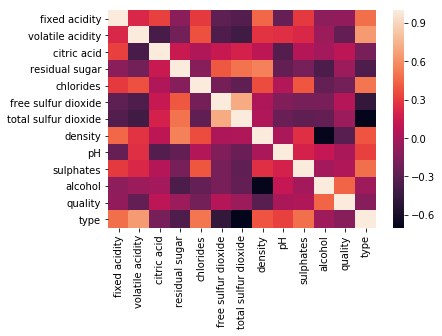

In [8]:
import seaborn as sns
#Seaborn là một thư viện cung cấp các hàm vẽ đồ thị
#Hướng dẫn cài đặt tại https://seaborn.pydata.org/installing.html#installing

import matplotlib.pyplot as plt

corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Phân chia các tập huấn luyện

In [9]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/nguyendovan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


# Mô hình hóa với scikit-learn


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors


Tạo mô hình phân lớp với thuật toán láng giềng gần nhất (k nearest classification)

In [11]:
n_neigbors = 5
weights = 'uniform'
clf = neighbors.KNeighborsClassifier(n_neigbors, weights)
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Đánh giá độ chính xác mô hình

Việc đánh giá độ chính xác của mô hình dựa trên nhãn được dự doán của các điểm dữ liệu thuộc tập test (độc lập với tập train) bởi mô hình, so sánh với nhãn đúng (ground truth). Độ chính xác được định lượng bởi tỉ số giữa số điểm dữ liệu được dự đoán đúng trên tổng số điểm dữ liệu thuộc tập test

In [12]:
from sklearn.metrics import jaccard_similarity_score

y_pred = clf.predict(X_test)
print(y_pred)

jaccard_similarity_score(y_test, y_pred)

[0 0 0 ..., 0 0 0]


0.93939393939393945

# Thử điều chỉnh tham số mô hình

Với trọng số là 'uniform', ảnh hưởng đến quyết định phân loại một điểm dữ liệu của k điểm láng riềng là như nhau. Điều này không thật tự nhiên vì láng riềng gần hơn nên có ảnh hưởng lớn hơn. Thử thay đổi cách tính trọng số dựa trên khoảng cách như sau (Mặc định với p=2, metric = 'minkowski' thì hàm khoảng cách tương đương với khoảng cách euclidean - l2 norm):

In [13]:
n_neigbors = 5
weights = 'distance'
clf = neighbors.KNeighborsClassifier(n_neigbors, weights)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
jaccard_similarity_score(y_test, y_pred)

0.95058275058275055